# 1. tmdb api를 활용하여 데이터 수집 및 적재
먼저, tmdb api를 사용하여서 미리 데이터를 몽고db에 저장해두었다.
</br>
총 385k 개의 영화 데이터를 수집했다.
</br>
(같은 레포지토리에 collect_tmdb_api.ipynb를 사용하면 적재가 가능하다. 반복문을 사용하여 id값이 1부터 순서대로 시간은 오래걸린다.)</br>
    - 먼저 tmdb api를 사용하기 위해 회원가입이 필요하다</br>
    - user api key</br>
https://developer.themoviedb.org/reference/intro/getting-started

![Alt text](image.png)

# 몽고db에서 데이터 가져오기
몽고db에 적재한 데이터를 가져오고, 해당 데이터의 모양을 확인한다.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymongo

In [82]:
# MongoDB 연결 문자열
connection_string = "mongodb://"

# MongoDB에 연결
client = pymongo.MongoClient(connection_string)

# 데이터베이스 선택 (예: "mydatabase"로 대체)
db = client["tmmovie"]

# 컬렉션 선택 (예: "mycollection"로 대체)
collection = db["detail"]

In [83]:
# MongoDB에서 데이터 가져오기
data = list(collection.find({}))  

# 데이터를 DataFrame으로 변환
df = pd.DataFrame(data)

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384725 entries, 0 to 384724
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   _id                    384725 non-null  object 
 1   adult                  384725 non-null  bool   
 2   backdrop_path          131073 non-null  object 
 3   belongs_to_collection  16760 non-null   object 
 4   budget                 384725 non-null  int64  
 5   genres                 384725 non-null  object 
 6   homepage               384725 non-null  object 
 7   id                     384725 non-null  int64  
 8   imdb_id                287199 non-null  object 
 9   original_language      384725 non-null  object 
 10  original_title         384725 non-null  object 
 11  overview               384725 non-null  object 
 12  popularity             384725 non-null  float64
 13  poster_path            280199 non-null  object 
 14  production_companies   384725 non-nu

In [85]:
display(df.head())

,_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,64af42af31b7d356a9517b20,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,None,0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",,2,tt0094675,fi,...,1988-10-21,0,73,"[{'english_name': 'Finnish', 'iso_639_1': 'fi'...",Released,,아리엘,False,7.066,257
1,64af42af31b7d356a9517b24,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,None,0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",,3,tt0092149,fi,...,1986-10-17,0,76,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,천국의 그림자,False,7.192,273
2,64af42b031b7d356a9517b28,False,/c1BaOxC8bo5ACFYkYYxL0bBWRaq.jpg,None,4000000,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",,5,tt0113101,en,...,1995-12-09,4257354,98,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,네 가지 이야기들로 이루어진 옴니버스 영화,포룸,False,5.777,2386
3,64af42b031b7d356a9517b2c,False,/lIuseocAIWrEq8zl4EBCBH96e4z.jpg,None,21000000,"[{'id': 28, 'name': '액션'}, {'id': 80, 'name': ...",,6,tt0107286,en,...,1993-10-15,12136938,109,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,킬러 나이트,False,6.562,289
4,64af42b131b7d356a9517b30,False,None,None,42000,"[{'id': 99, 'name': '다큐멘터리'}]",,8,tt0825671,en,...,2006-01-01,0,80,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Life in Loops (A Megacities RMX),False,7.700,25


## 2. 데이터 전처리
여기에서는 다음과 같은 과정을 수행할 것이다.
1. 결측치 찾기
2. 전처리

### 2-1 결측치를 정리한다

In [86]:
df = df.drop(columns= ["_id",
                        "backdrop_path",
                        "belongs_to_collection",
                        "homepage",
                        "imdb_id",
                        "overview",
                        "popularity",
                        "poster_path",
                        "revenue",
                        "spoken_languages",
                        "status",
                        "tagline",
                        "video"])
df = df.drop([0], axis=0)

print(df.isnull().sum())

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
production_companies    0
production_countries    0
release_date            0
runtime                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [87]:
display(df[df.budget.isnull()])
display(df[df.genres.isnull()])

print("every column have values")

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count


,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count


every column have values


In [88]:
df

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
1,False,0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",3,fi,Varjoja paratiisissa,"[{'id': 2303, 'logo_path': None, 'name': 'Vill...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1986-10-17,76,천국의 그림자,7.192,273
2,False,4000000,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",5,en,Four Rooms,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,98,포룸,5.777,2386
3,False,21000000,"[{'id': 28, 'name': '액션'}, {'id': 80, 'name': ...",6,en,Judgment Night,"[{'id': 1644, 'logo_path': None, 'name': 'Larg...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-10-15,109,킬러 나이트,6.562,289
4,False,42000,"[{'id': 99, 'name': '다큐멘터리'}]",8,en,Life in Loops (A Megacities RMX),"[{'id': 19123, 'logo_path': None, 'name': 'inL...","[{'iso_3166_1': 'AT', 'name': 'Austria'}]",2006-01-01,80,Life in Loops (A Megacities RMX),7.700,25
5,False,0,"[{'id': 18, 'name': '드라마'}]",9,de,Sonntag im August,[],"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2004-09-02,15,Sonntag im August,7.600,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384720,False,0,[],288993,en,"I, Nuligak : an Inuvialuit history of first co...","[{'id': 28800, 'logo_path': None, 'name': 'Whi...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2005-06-07,70,"I, Nuligak : an Inuvialuit history of first co...",0.000,0
384721,False,0,"[{'id': 99, 'name': '다큐멘터리'}]",848877,en,Queer Time,[],"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2021-06-30,5,Queer Time,0.000,0
384722,False,0,"[{'id': 10751, 'name': '가족'}, {'id': 16, 'name...",288998,nl,Maya de Bij - De Bijendans,"[{'id': 25894, 'logo_path': '/sqfAZ2i3iyLUrWFk...",[],2012-02-20,0,Maya de Bij - De Bijendans,0.000,0
384723,False,0,"[{'id': 10751, 'name': '가족'}, {'id': 16, 'name...",314580,en,VeggieTales: Very Silly Songs,"[{'id': 3204, 'logo_path': '/nopaAq45DIGfiWTRW...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-01-01,32,VeggieTales: Very Silly Songs,8.200,3


In [89]:
zero_budget_rows = df[df['budget'] == 0]

# 결과 출력
num_columns = zero_budget_rows.shape[0]
print(f"예산이 0인 영화 갯수 : {num_columns}")

예산이 0인 영화 갯수 : 361220


전체데이터의 93.89%의 데이터가 budget 값을 가지고있지 않다.

### 2-2 전처리를 하자

budget이 없는 데이터가 많아 해당 데이터는 결측치를 포함한 상태로 놔둔다 <br>
그리고 장르와 제작사, 제작사국적, 개봉일을 전처리 해준다.

In [90]:
df.head()

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
1,False,0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",3,fi,Varjoja paratiisissa,"[{'id': 2303, 'logo_path': None, 'name': 'Vill...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1986-10-17,76,천국의 그림자,7.192,273
2,False,4000000,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",5,en,Four Rooms,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,98,포룸,5.777,2386
3,False,21000000,"[{'id': 28, 'name': '액션'}, {'id': 80, 'name': ...",6,en,Judgment Night,"[{'id': 1644, 'logo_path': None, 'name': 'Larg...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-10-15,109,킬러 나이트,6.562,289
4,False,42000,"[{'id': 99, 'name': '다큐멘터리'}]",8,en,Life in Loops (A Megacities RMX),"[{'id': 19123, 'logo_path': None, 'name': 'inL...","[{'iso_3166_1': 'AT', 'name': 'Austria'}]",2006-01-01,80,Life in Loops (A Megacities RMX),7.700,25
5,False,0,"[{'id': 18, 'name': '드라마'}]",9,de,Sonntag im August,[],"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2004-09-02,15,Sonntag im August,7.600,22


먼저 데이터를 깔끔하게 만들어준다.

In [91]:
df['release_date'] = df['release_date'].fillna(0)

In [92]:
def cleaning_df(df):
    clean_df = df.copy()
    clean_df['genres'] = df['genres'].apply(lambda x: ', '.join([genre['name'] for genre in x]))
    clean_df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join([company['name'] for company in x]))
    clean_df['production_countries'] = df['production_countries'].apply(lambda x: ', '.join([company['name'] for company in x]))
    clean_df['release_date'] = pd.to_datetime(df['release_date']).dt.year
    return clean_df

clean_df = cleaning_df(df)
display(clean_df.head())


,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
1,False,0,"드라마, 코미디, 로맨스",3,fi,Varjoja paratiisissa,Villealfa Filmproductions,Finland,1986.0,76,천국의 그림자,7.192,273
2,False,4000000,"범죄, 코미디",5,en,Four Rooms,"Miramax, A Band Apart",United States of America,1995.0,98,포룸,5.777,2386
3,False,21000000,"액션, 범죄, 스릴러",6,en,Judgment Night,"Largo Entertainment, JVC",United States of America,1993.0,109,킬러 나이트,6.562,289
4,False,42000,다큐멘터리,8,en,Life in Loops (A Megacities RMX),inLoops,Austria,2006.0,80,Life in Loops (A Megacities RMX),7.700,25
5,False,0,드라마,9,de,Sonntag im August,,Germany,2004.0,15,Sonntag im August,7.600,22


In [93]:
clean_df.head()


,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
1,False,0,"드라마, 코미디, 로맨스",3,fi,Varjoja paratiisissa,Villealfa Filmproductions,Finland,1986.0,76,천국의 그림자,7.192,273
2,False,4000000,"범죄, 코미디",5,en,Four Rooms,"Miramax, A Band Apart",United States of America,1995.0,98,포룸,5.777,2386
3,False,21000000,"액션, 범죄, 스릴러",6,en,Judgment Night,"Largo Entertainment, JVC",United States of America,1993.0,109,킬러 나이트,6.562,289
4,False,42000,다큐멘터리,8,en,Life in Loops (A Megacities RMX),inLoops,Austria,2006.0,80,Life in Loops (A Megacities RMX),7.700,25
5,False,0,드라마,9,de,Sonntag im August,,Germany,2004.0,15,Sonntag im August,7.600,22


In [94]:
clean_df = clean_df[clean_df['runtime'] != 0]

In [95]:
sort_df = clean_df.sort_values(by='runtime', ascending=False)

In [96]:
sort_df.head()

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
381364,False,0,"판타지, 드라마",280773,sv,Ambiancé,,Sweden,2020.0,43200,Ambiancé,3.0,4
372269,False,0,다큐멘터리,251800,en,"Stora Enso Building, Helsinki",,"Denmark, Finland, Vietnam",2011.0,14400,"Stora Enso Building, Helsinki",7.0,2
352915,False,0,다큐멘터리,710874,en,Svalbard minutt for minutt,,,2020.0,13319,Svalbard minutt for minutt,0.0,0
114577,False,0,다큐멘터리,272074,fr,Cinématon,"K.O.C.K. Production, Les Amis de Cinématon",France,1978.0,12480,Cinématon,4.3,6
185950,False,0,다큐멘터리,197299,en,Beijing 2003,Ai Weiwei Studio,China,2004.0,9000,Beijing 2003,1.0,1


장르가 없는 데이터는 제거해준다</br>
runtime이 30분 이하 5시간 이상인 데이터는 노이즈 데이터로 보인다.</br>
-> 제거해준다. drop

In [97]:
clean_df = clean_df[clean_df['genres'].notna() & (clean_df['genres'] != "")]
clean_df = clean_df[clean_df['runtime'] <= 300]
clean_df = clean_df[clean_df['runtime'] > 30]

In [98]:
sort_df = clean_df.sort_values(by='runtime', ascending=False)
sort_df.head()

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
331310,False,0,코미디,360352,en,The 100 Greatest Stand Ups 2010,Visual Voodoo,United Kingdom,2010.0,300,The 100 Greatest Stand Ups 2010,0.0,0
41357,False,0,"드라마, 역사",77813,ru,Овраги,Odessa Film Studio,Soviet Union,1990.0,300,Овраги,0.0,0
225641,True,0,다큐멘터리,1006052,ja,素人バラエティしろマン娘アクメ潮大作戦！ぴっしゃぴっしゃ弾く潮！潮！潮！300分作品集,Sadistic Village,Japan,2022.0,300,素人バラエティしろマン娘アクメ潮大作戦！ぴっしゃぴっしゃ弾く潮！潮！潮！300分作品集,0.0,0
225627,True,0,다큐멘터리,1006051,ja,羞恥！衆人が見守る中で全裸にされポロンと飛び出たおっぱいを乳房検診69人作品集！,Sadistic Village,Japan,2022.0,300,羞恥！衆人が見守る中で全裸にされポロンと飛び出たおっぱいを乳房検診69人作品集！,0.0,0
23307,False,0,다큐멘터리,62549,en,Concorde - British Airways,,"United Kingdom, United States of America",1996.0,300,Concorde - British Airways,0.0,0


In [99]:
sort_df = clean_df.sort_values(by='runtime', ascending=True)
sort_df.head()

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count
312008,False,0,"애니메이션, 액션",334917,ja,デッドヒート,SUNRISE,Japan,1987.0,31,데드 히트,0.0,0
212866,False,8000000,"액션, 모험, 판타지",1009402,ko,특근,MoonWatcher,South Korea,2016.0,31,특근,4.0,1
303181,False,0,범죄,461854,en,刀俎,,China,2016.0,31,刀俎,0.0,0
303783,True,0,애니메이션,204733,ja,センシティブ・ポルノグラフ,"Phoenix Entertainment, Digital Works",Japan,2004.0,31,センシティブ・ポルノグラフ,2.8,2
211567,False,0,다큐멘터리,1081283,hr,Otkriće i razvoj filma,Hrvatska Radiotelevizija,Croatia,2006.0,31,Otkriće i razvoj filma,0.0,0


## 3. 데이터 분석

일단 필요한 데이터 전처리는 완료하였다.<br>
해당 데이터를 활용하여 분석한다.

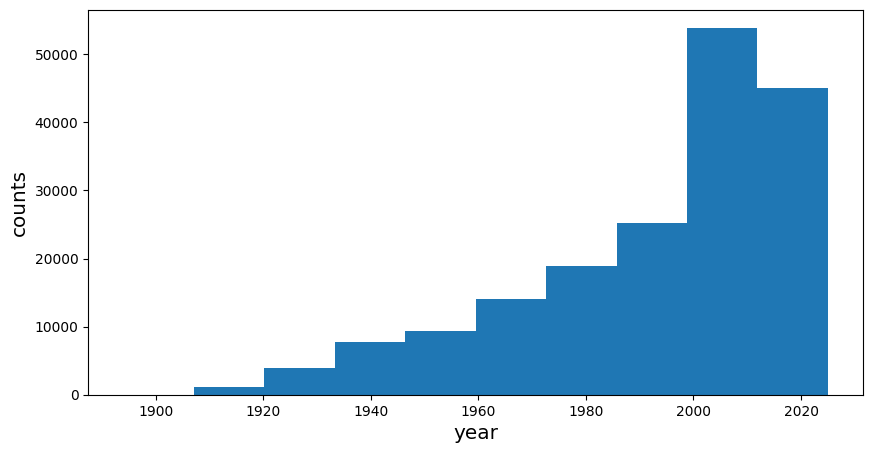

In [100]:
from pandas.plotting import register_matplotlib_converters
import datetime

pd.plotting.register_matplotlib_converters()
y = [clean_df.release_date]

plt.figure(figsize=(10,5))
plt.hist(y)
plt.xlabel('year', size= 'x-large')
plt.ylabel('counts', size= 'x-large')
plt.show()

2000년대 이후의 작품수가 급격히 증가한 것으로 보여진다.

### 상영시간 시각화

In [101]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

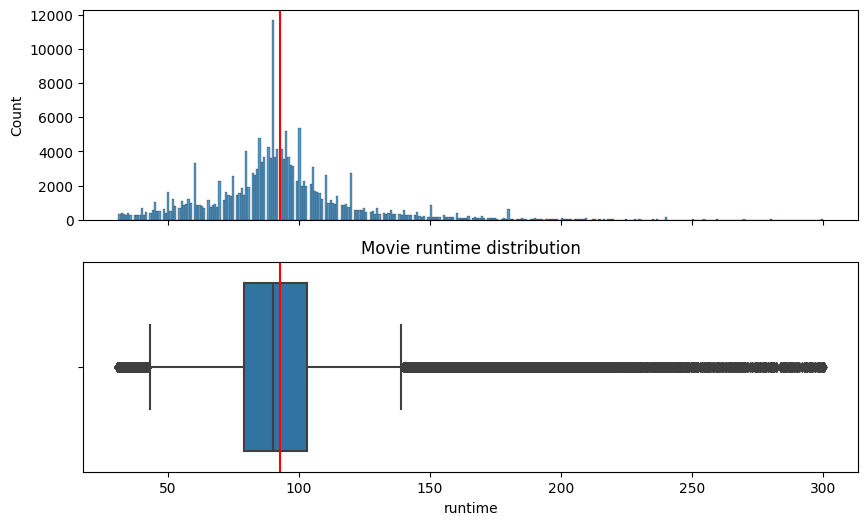

In [103]:
import plotly.graph_objects as go

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
plt.title("Movie runtime distribution",loc="center")

axes[0].axvline(np.mean(clean_df.runtime),color="r")
sns.histplot(clean_df.runtime, label="runtime",ax=axes[0])
axes[1].axvline(np.mean(clean_df.runtime),color="r")
sns.boxplot(x=clean_df.runtime)

plt.show()

상영시간을 시각화하기 위하여 plotly를 이용하였다.<br>
약 80~90분의 작품이 가장 많다는 것을 알 수 있고, 평군값도 비슷하다는 것을 알 수 있다.

### 어느 언어가 가장 많은가?

In [104]:
print(clean_df.original_language.value_counts())

en    97522
ja     9918
fr     9642
de     8320
es     7701
      ...  
co        1
sm        1
mh        1
cr        1
ss        1
Name: original_language, Length: 138, dtype: int64


총 138개의 언어로 제작되었으며, 영어 일본어 프랑스어 독일어 순으로 볼 수 있다.

# 국가별 작품수 시각화

In [118]:
clean_df

,adult,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count,latitude,longitude
1,False,0,"드라마, 코미디, 로맨스",3,fi,Varjoja paratiisissa,Villealfa Filmproductions,Finland,1986.0,76,천국의 그림자,7.192,273,None,None
2,False,4000000,"범죄, 코미디",5,en,Four Rooms,"Miramax, A Band Apart",United States of America,1995.0,98,포룸,5.777,2386,None,None
3,False,21000000,"액션, 범죄, 스릴러",6,en,Judgment Night,"Largo Entertainment, JVC",United States of America,1993.0,109,킬러 나이트,6.562,289,None,None
4,False,42000,다큐멘터리,8,en,Life in Loops (A Megacities RMX),inLoops,Austria,2006.0,80,Life in Loops (A Megacities RMX),7.700,25,None,None
6,False,11000000,"모험, 액션, SF",11,en,Star Wars,"Lucasfilm Ltd., 20th Century Fox",United States of America,1977.0,121,스타워즈 에피소드 4: 새로운 희망,8.203,18857,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384715,False,0,"드라마, 범죄",314520,en,Veve,"One Fine Day Films, Ginger Ink Films",Germany,2014.0,90,Veve,6.200,9,None,None
384716,False,0,다큐멘터리,848837,en,Violated,,,2020.0,42,Violated,0.000,0,None,None
384717,False,0,"드라마, 코미디",288988,no,Hustruer - ti år etter,Norsk Film,Norway,1985.0,88,Hustruer - ti år etter,4.500,4,None,None
384719,False,0,다큐멘터리,314540,bg,"Uncle Tony, Three Fools and the Secret Service",Activist 38,Bulgaria,2014.0,86,"Uncle Tony, Three Fools and the Secret Service",8.000,1,None,None


In [105]:
# 결측값을 제외하고 유효한 값만 확인
valid_countries = clean_df['production_countries'].str.split(', ').explode().dropna().unique()

# 결과 출력
print(valid_countries)


['Finland' 'United States of America' 'Austria' 'Argentina' 'Denmark'
 'France' 'Germany' 'Iceland' 'Italy' 'Netherlands' 'Norway' 'Sweden'
 'United Kingdom' 'Canada' 'Spain' 'Israel' 'Mexico'
 'Palestinian Territory' 'Switzerland' 'Hong Kong' 'China' 'Japan'
 'Uruguay' 'Paraguay' 'Poland' 'South Korea' 'Ireland' 'Luxembourg'
 'New Zealand' 'Taiwan' 'South Africa' 'Australia' 'Czech Republic'
 'Hungary' 'Bosnia and Herzegovina' 'Croatia' 'Turkey' 'Portugal'
 'Ecuador' 'Colombia' 'India' 'Uganda' 'Belgium' 'Russia' 'Soviet Union'
 'Brazil' 'Malta' 'Greece' 'Czechoslovakia' 'East Germany' 'Serbia'
 'Mongolia' 'Morocco' 'Estonia' 'Latvia' 'Bahamas' 'Bulgaria' 'Chile'
 'Peru' 'Liechtenstein' '' 'Thailand' 'Burkina Faso' 'Egypt' 'Iran'
 'Lebanon' 'Yugoslavia' 'Romania' 'Algeria' 'Djibouti' 'Cuba' 'Slovenia'
 'Afghanistan' 'Georgia' 'Slovakia' 'Venezuela' 'Vietnam'
 'Serbia and Montenegro' 'Haiti' 'Ukraine' 'Namibia' 'Andorra' 'Lithuania'
 'Jamaica' 'Iraq' 'Botswana' 'Solomon Islands' 'Singa

### 어떤 영화의 예산이 많이 사용되었는가?

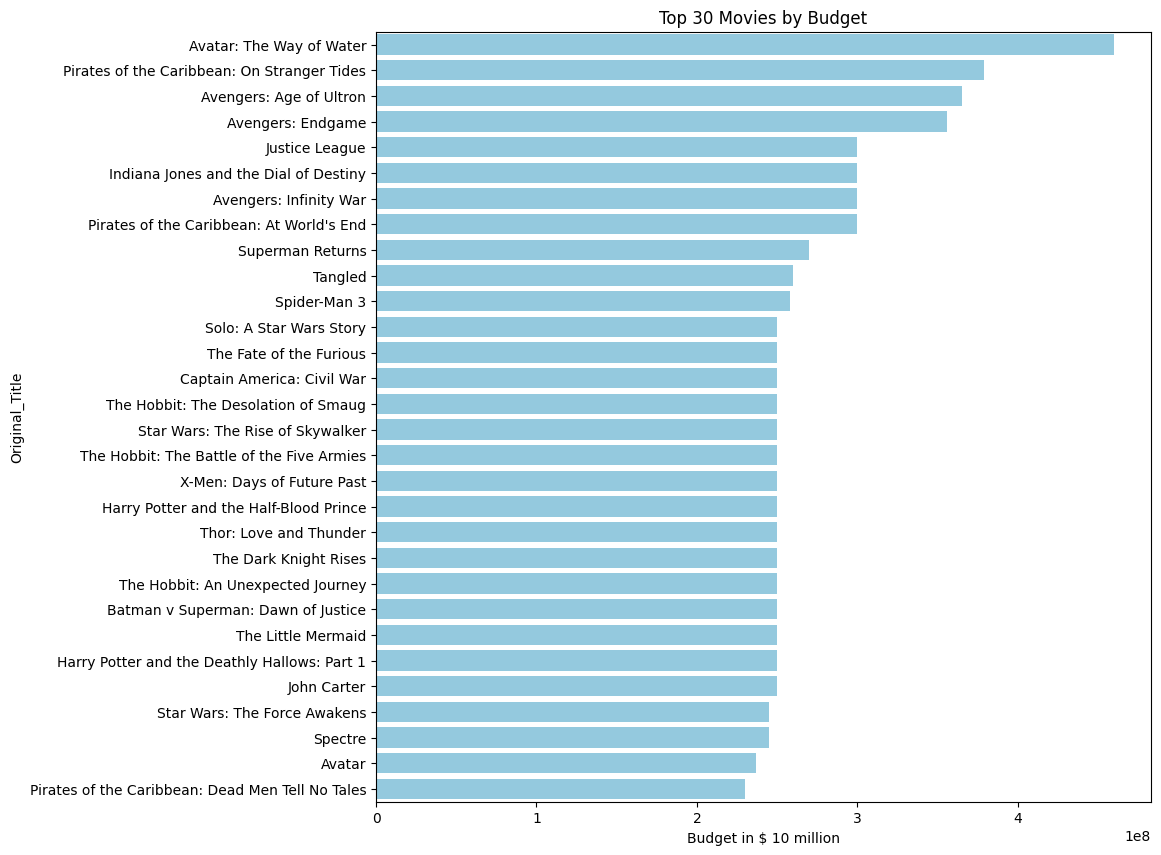

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예산이 많이 쓰인 상위 30개의 영화
top_30_movies = clean_df.sort_values(by='budget', ascending=False).head(30)

fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = top_30_movies[["original_title", "budget"]].melt(id_vars='original_title').rename(columns=str.title)
sns.barplot(y='Original_Title', x='Value', data=tidy, ax=ax1, color="skyblue")
plt.title("Top 30 Movies by Budget")
plt.xlabel("Budget in $ 10 million")

plt.show()


아바타 물의 길이 가장 많은 예산을 사용했다는 것을 알 수 있다.<br>
그렇다면 예산을 많이 사용했으면 더 좋은 결과를 내는가?를 알아보았다.

### 예산과 투표수를 비교

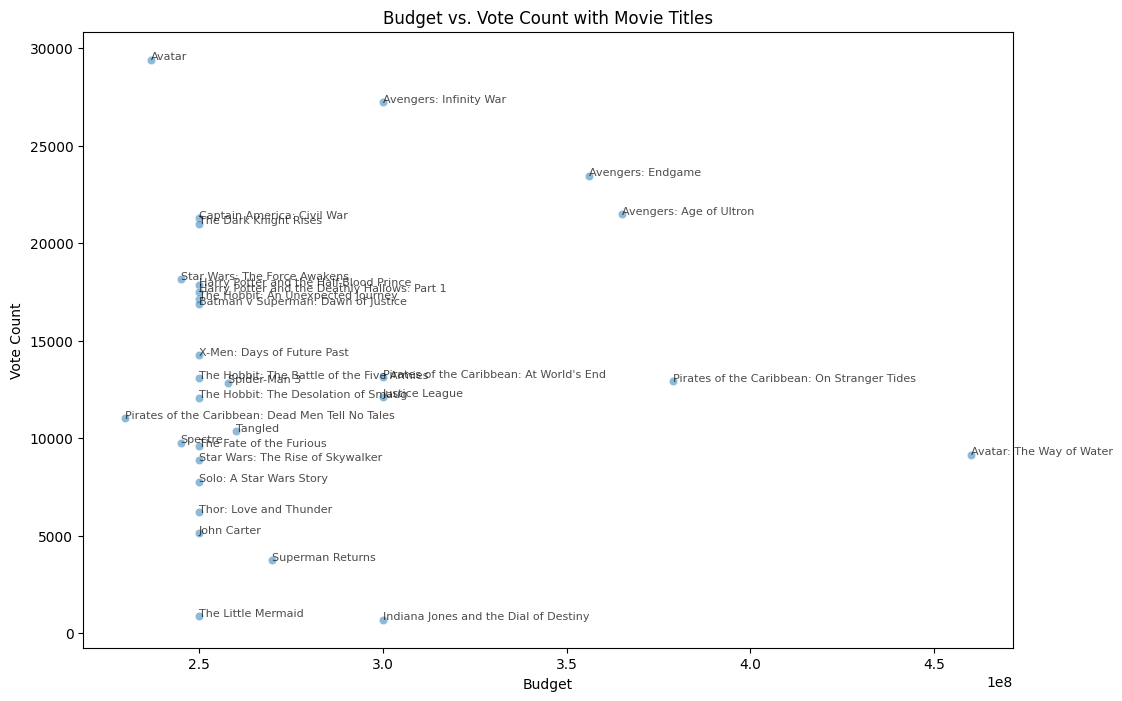

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='vote_count', data=top_30_movies, alpha=0.5)

# 각 데이터 포인트에 영화 제목 추가하기
for i, row in top_30_movies.iterrows():
    plt.text(row['budget'], row['vote_count'], row['original_title'], fontsize=8, alpha=0.7)

plt.title("Budget vs. Vote Count with Movie Titles")
plt.xlabel("Budget")
plt.ylabel("Vote Count")

# 그래프 표시
plt.show()


투표수 != 시청수이지만 <br>
관람객이 영화를 보고 투표를 했다고 가정을 한다면<br>
가장 많은 예산을 사용한 아바타 물의길보다 절반의 예산을 사용한 아바타가 더 좋은 성적을 거뒀다는 것을 알 수 있다.<br>
전작의 흥행 -> 과감한 투자 -> 실패 라는 결과를 얻었다고 보여진다.

### 예산과 평점을 비교

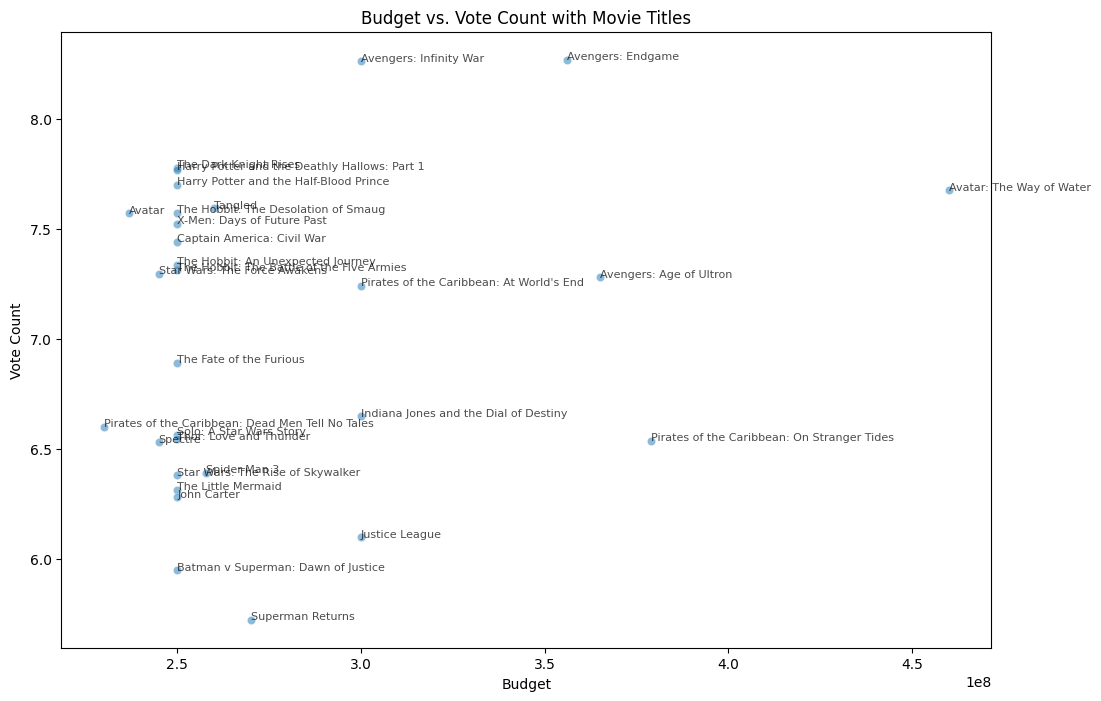

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='vote_average', data=top_30_movies, alpha=0.5)

# 각 데이터 포인트에 영화 제목 추가하기
for i, row in top_30_movies.iterrows():
    plt.text(row['budget'], row['vote_average'], row['original_title'], fontsize=8, alpha=0.7)

plt.title("Budget vs. Vote Count with Movie Titles")
plt.xlabel("Budget")
plt.ylabel("Vote Count")

# 그래프 표시
plt.show()


평점과 예산을 비교해보았다.<br>
슈퍼맨리턴즈가 처참한 성적을 거두었다. 또한 배트맨 슈퍼맨도 좋지 않은 평점을 받았다.<br>
그렇다면 슈퍼맨의 제작사는 좋지 못한 성적으로 투자를 실패한 것으로 보이는데<br>
어떤 제작사가 많은 예산을 부어 실패를 했는지 알아본다.<br>

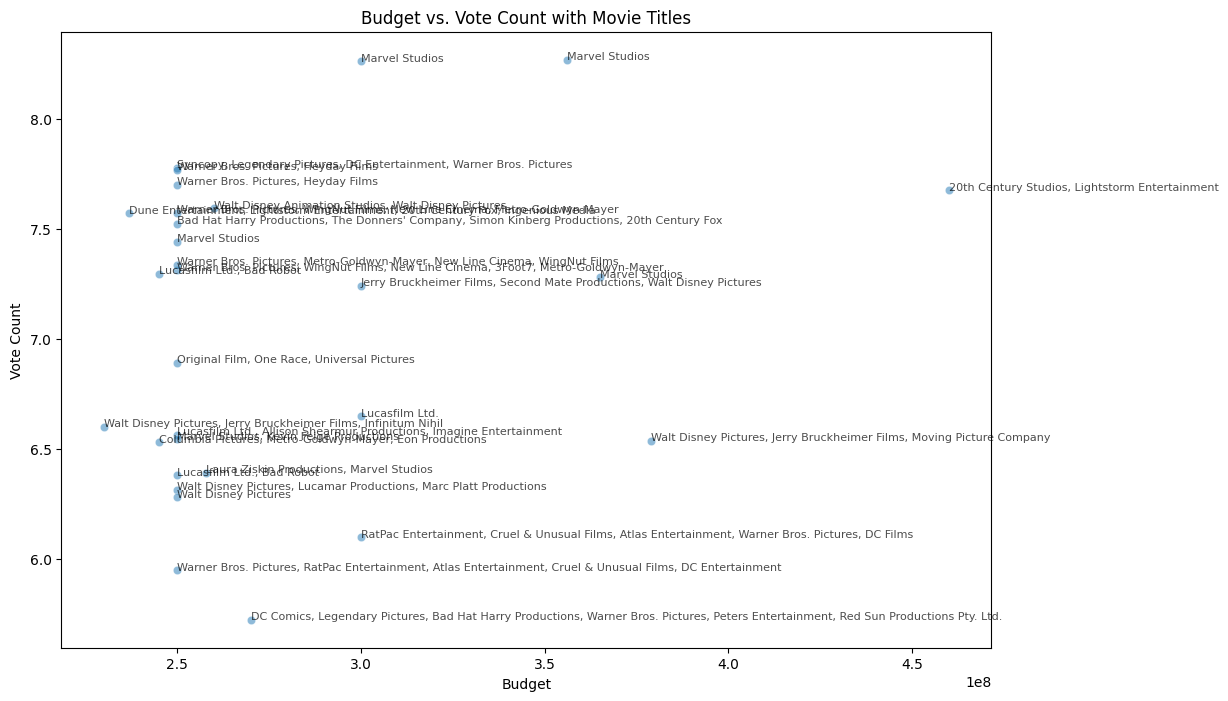

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='vote_average', data=top_30_movies, alpha=0.5)

# 각 데이터 포인트에 영화제작사 추가하기
for i, row in top_30_movies.iterrows():
    plt.text(row['budget'], row['vote_average'], row['production_companies'], fontsize=8, alpha=0.7)

plt.title("Budget vs. Vote Count with Movie Titles")
plt.xlabel("Budget")
plt.ylabel("Vote Count")

# 그래프 표시
plt.show()


역시 마블의 평점이 높다.<br>
아이언맨의 효과일까?

### 성인영화(폭력물 포함)와 일반 영화의 만족도 차이는 어떻게 될까?

In [123]:
vote_df =  clean_df[clean_df['vote_count'] >= 50]

<Axes: xlabel='adult', ylabel='vote_average'>

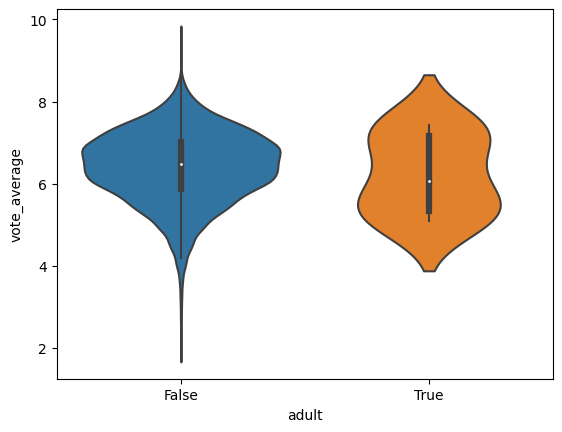

In [124]:
sns.violinplot(y = vote_df['vote_average'], x = vote_df['adult'])

성인영화와 일반 영화는 평점의 차이로 볼 수 있다.<br>


# 4. 느낀점 및 추가할 사항
1. 데이터를 db에 적재, 시각화 작업을 하였는데 어떤 기준을 잡고 전처리를 하느냐에 따라서 값이 많이 달라진다는 것을 알 수 있었다.
2. 지도에 어느나라가 제작한 영화가 많은지 표시하고 싶었으나, 해당 데이터에는 gps 좌표를 추가하지 않아서 어려움이 있었다.

